## Testing 2D Propagation

In [1]:
import sys
import os

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo


## Create 1D Aperture

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo

# Parameters
wavelength = 633e-9   # 633 nm
dx = 10e-6            # pixel size 10 µm
N = 1024              # grid size
z = 0.5               # propagation distance
slit_width = 100e-6   # 100 µm

# Coordinates
x = (np.arange(N) - N//2) * dx

# Rectangular slit
u0 = np.zeros(N, dtype=complex)
u0[np.abs(x) < slit_width/2] = 1.0



## Fresnel Transfer Function

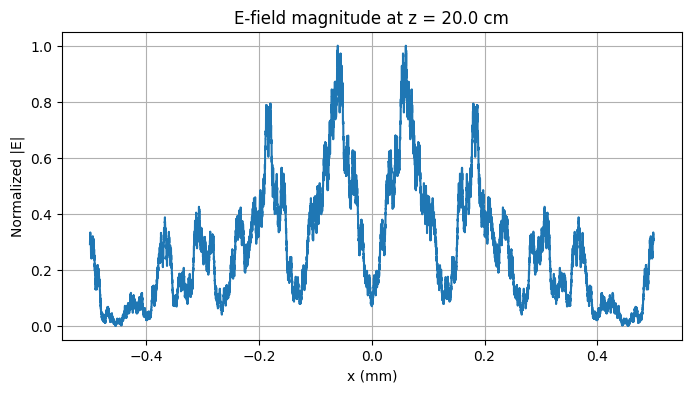

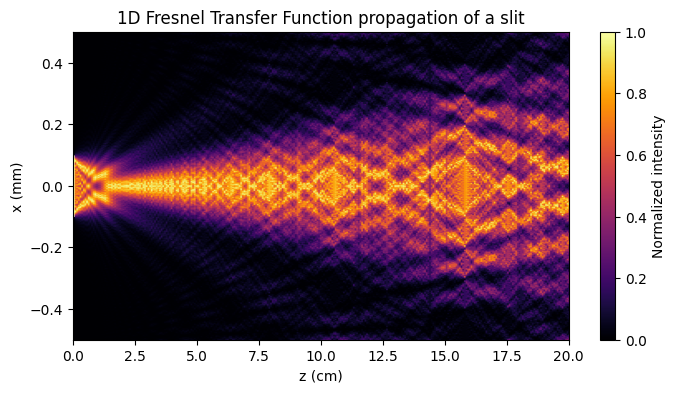

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo

# -------------------------
# Parameters
# -------------------------
N = int(1e5)                # grid points
dx = 1e-8              # 10 µm grid spacing
wavelength = 633e-9     # 633 nm
z_max = 0.2             # 20 cm propagation
slit_width = 200e-6     # 200 µm slit

# -------------------------
# 1D coordinate grid and slit
# -------------------------
x = fo.coords_1D(N, dx)
E0 = np.zeros(N, dtype=complex)
E0[np.abs(x) < slit_width/2] = 1.0

# -------------------------
# Compute z-step intensity map using 1D Fresnel Transfer Function
# -------------------------
I_map, z_vals = fo.z_step_1D(E0, x, fo.fresnel_tf_1D, wavelength, z_range=z_max, n_points=300)

# -------------------------
# Plot E-field magnitude at final z
# -------------------------
plt.figure(figsize=(8,4))
plt.plot(x*1e3, np.abs(I_map[:,-1]) / np.max(np.abs(I_map[:,-1])), label='|E| (magnitude)')
plt.xlabel("x (mm)")
plt.ylabel("Normalized |E|")
plt.title(f"E-field magnitude at z = {z_vals[-1]*100:.1f} cm")
plt.grid(True)
plt.show()

# -------------------------
# Plot intensity map
# -------------------------
plt.figure(figsize=(8,4))
plt.imshow(I_map, extent=[z_vals[0]*1e2, z_vals[-1]*1e2, x[0]*1e3, x[-1]*1e3],
           aspect='auto', cmap='inferno', origin='lower')
plt.xlabel("z (cm)")
plt.ylabel("x (mm)")
plt.title("1D Fresnel Transfer Function propagation of a slit")
plt.colorbar(label="Normalized intensity")
plt.show()


## Angular Spectrum Method